# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Install packages

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 894.6/894.6 kB 20.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.42.0
    Uninstalling wheel-0.42.0:
      Successfully uninstalled wheel-0.42.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.0.3
    Uninstalling setuptools-69.0.3:
      Successfully uninstalled setuptools-69.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
conda 24.3.0 requires packaging>

### Setup Kaggle API Key

In [4]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "mohammadabdullah407"
kaggle_key = "a0e9de5cabf9f8529a6a0587dffd98b5"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [6]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
100%|█████████████████████████████████████████| 189k/189k [00:00<00:00, 780kB/s]
100%|█████████████████████████████████████████| 189k/189k [00:00<00:00, 778kB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [7]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [8]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv',parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [10]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test =pd.read_csv('test.csv',parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [11]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv',parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [12]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [13]:
columns_to_exclude = ['casual', 'registered']
train = train.loc[:, ~train.columns.isin(columns_to_exclude)]
test = test.loc[:, ~test.columns.isin(columns_to_exclude)]

In [14]:
predictor = TabularPredictor(label='count',problem_type='regression',eval_metric='root_mean_squared_error').fit(
    train_data=train,
    time_limit=600,
    presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240508_063433"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240508_063433/ds_sub_fit/sub_fit_ho.
2024-05-08 06:34:34,287	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.

### Review AutoGluon's training run with ranking of models that did the best.

In [15]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.791695  root_mean_squared_error      33.475302  405.441533                0.000816           0.041182            3       True         13
1   RandomForestMSE_BAG_L2  -53.081380  root_mean_squared_error      22.566180  302.851827                0.757671          20.802206            2       True         12
2          LightGBM_BAG_L2  -54.838659  root_mean_squared_error      22.513532  304.854618                0.705023          22.804996            2       True         11
3        LightGBMXT_BAG_L2  -60.262596  root_mean_squared_error      32.011793  361.793149               10.203283          79.743527            2       True         10
4    KNeighborsDist_BAG_L1  -84.169493  root_mean_squared_error       0.064428    0.039541   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.63296540177245,
  'KNeighborsDist_BAG_L1': -84.16949269107224,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.52772441991914

### Create predictions from test dataset

In [16]:
predictions = predictor.predict(test)

INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [17]:
# Describe the `predictions` series to see if there are any negative values

description = predictions.describe()

# Check if there are any negative values
has_negative_values = (predictions < 0).any()

print("Description of predictions series:")
print(description)
if has_negative_values== True:
  print("\npredictions series contain negative values ")
else:
  print("\npredictions series doesn't contain negative values")

Description of predictions series:
count    6493.000000
mean      100.190765
std        89.260872
min         3.158323
25%        20.056402
50%        64.260895
75%       165.219162
max       365.642792
Name: count, dtype: float64

predictions series doesn't contain negative values


In [18]:
# How many negative values do we have?
num_negative_values = (predictions < 0).sum()
print("Number of negative values in predictions series:", num_negative_values)

Number of negative values in predictions series: 0


In [19]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [20]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [21]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 332kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [22]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2024-05-08 06:46:05  first raw submission               complete  1.79883      1.79883       
submission_new_hpo.csv       2024-05-03 18:05:11  new features with hyperparameters  complete  1.31673      1.31673       
submission_new_features.csv  2024-05-03 17:57:13  new features                       complete  1.33877      1.33877       
submission.csv               2024-05-03 17:45:21  first raw submission               complete  1.79494      1.79494       


In [23]:
initial = predictor.evaluate(train)

INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


In [24]:
initial_rmse=initial.get('root_mean_squared_error')
initial_mse=initial.get('mean_squared_error')
initial_mae=initial.get('mean_absolute_error')
initial_r2=initial.get('r2')

#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [ ]:
import matplotlib.pyplot as plt
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [26]:
# create a new feature
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day

train.drop(columns=['datetime'], inplace=True)
test.drop(columns=['datetime'], inplace=True)

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [27]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')

test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [28]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1


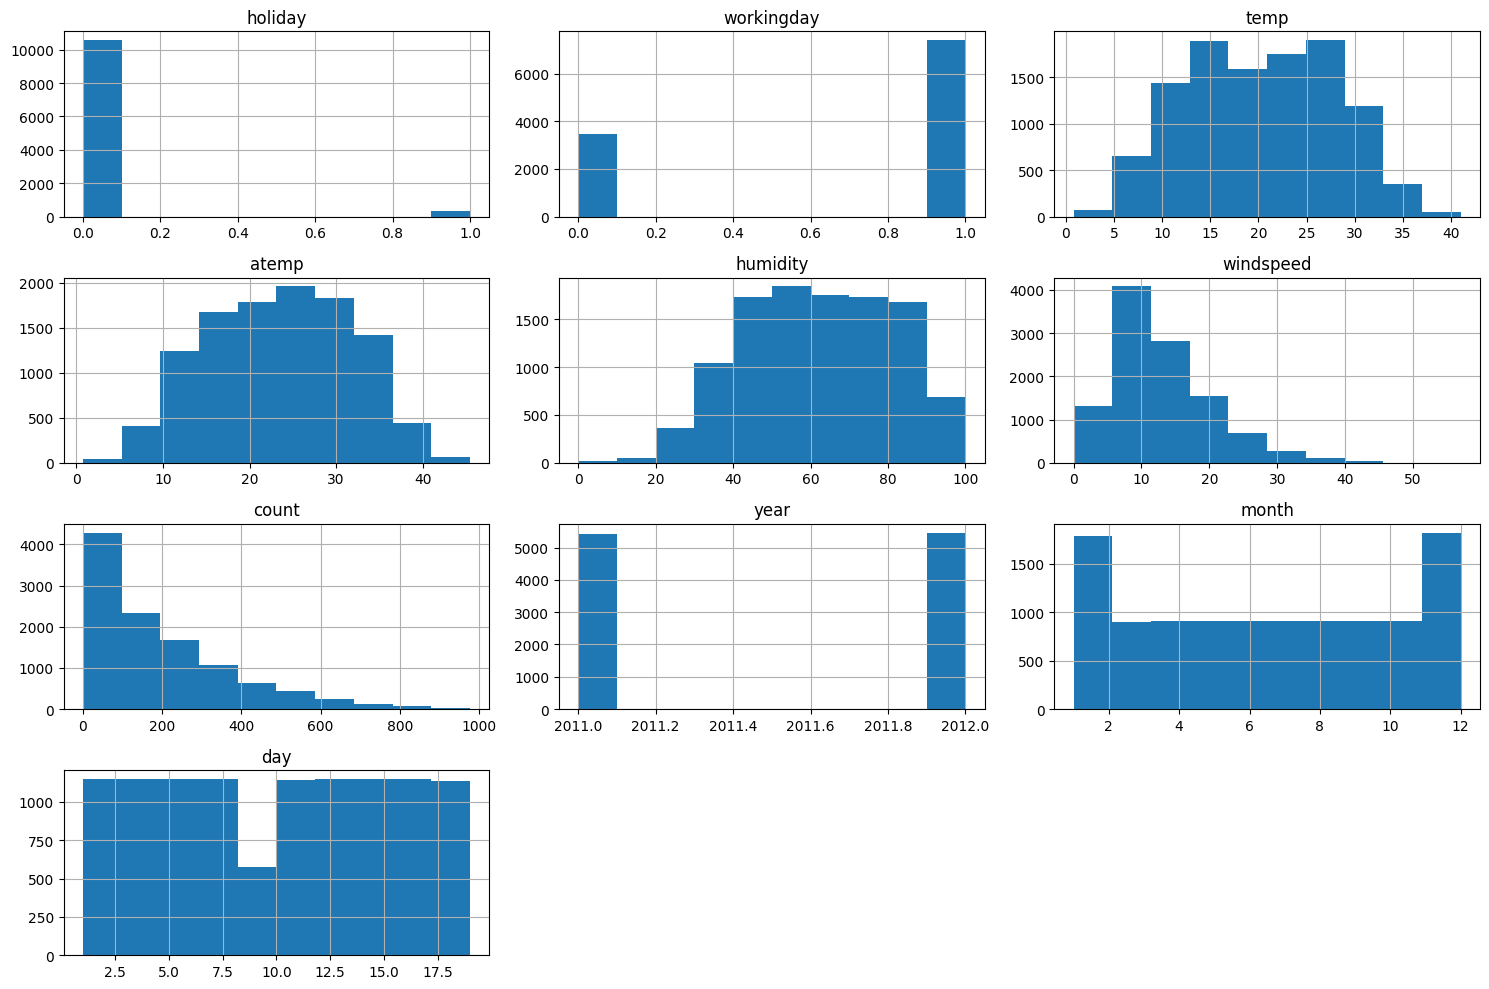

In [29]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [30]:
predictor_new_features = TabularPredictor(label='count',problem_type='regression',eval_metric='root_mean_squared_error').fit(
    train_data=train,
    time_limit=600,
    presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240508_064753"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240508_064753/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 166 seconds

In [31]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -126.390271  root_mean_squared_error      23.009107  392.238359                0.000848           0.080282            3       True         16
1        LightGBMXT_BAG_L2 -127.095402  root_mean_squared_error      21.147568  302.722903                0.392735          16.318001            2       True         10
2          CatBoost_BAG_L2 -127.149821  root_mean_squared_error      20.854671  325.289553                0.099837          38.884651            2       True         13
3     ExtraTreesMSE_BAG_L2 -127.206922  root_mean_squared_error      21.500166  292.578216                0.745333           6.173315            2       True         14
4          LightGBM_BAG_L2 -127.448056  root_mean_squared_error      21.097836  303.465461   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -154.39977199575284,
  'KNeighborsDist_BAG_L1': -154.5276267414449

In [32]:
# Remember to set all negative values to zero
predictions = predictor_new_features.predict(test)
predictions[predictions < 0] = 0

INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


In [33]:
submission_new_features=pd.read_csv('sampleSubmission.csv',parse_dates=['datetime'])

In [35]:
# Same submitting predictions
submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [36]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 323kB/s]
Successfully submitted to Bike Sharing Demand

In [37]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-05-08 07:15:03  new features                       complete  1.34242      1.34242       
submission.csv               2024-05-08 06:46:05  first raw submission               complete  1.79883      1.79883       
submission_new_hpo.csv       2024-05-03 18:05:11  new features with hyperparameters  complete  1.31673      1.31673       
submission_new_features.csv  2024-05-03 17:57:13  new features                       complete  1.33877      1.33877       


In [38]:
add_features = predictor_new_features.evaluate(train)

INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


In [39]:
add_features_rmse=add_features.get('root_mean_squared_error')
add_features_mse=add_features.get('mean_squared_error')
add_features_mae=add_features.get('mean_absolute_error')
add_features_r2=add_features.get('r2')

#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [40]:
# Initialize TabularPredictor
predictor_new_hpo = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error').fit(
    train_data=train,
    hyperparameters = {'GBM': {'num_boost_round': 1000000}, 'CAT': {'iterations': 100000}},
    hyperparameter_tune_kwargs={ 'num_trials': 6, 'scheduler' : 'local','searcher': 'random',},
    time_limit=600,
    presets='best_quality'
    )

No path specified. Models will be saved in: "AutogluonModels/ag-20240508_071600"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240508_071600/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 141 seconds

  0%|          | 0/6 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.03%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.03%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-132.7413	 = Validation score   (-root_mean_squared_error)
	26.25s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-132.0438	 = Validation score   (-root_mean_squared_error)
	21.04s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-132.991	 = Validation score   (-root_mean_squared_error)
	29.17s	 = Training   r

  0%|          | 0/6 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	-133.891	 = Validation score   (-root_mean_squared_error)
	168.86s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 117.58s of remaining time.
	Ensemble Weights: {'LightGBM_BAG_L1/T4': 0.429, 'LightGBM_BAG_L1/T2': 0.357, 'CatBoost_BAG_L1/T1': 0.143, 'LightGBM_BAG_L1/T3': 0.071}
	-131.1901	 = Validation score   (-root_mean_squared_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 341.47s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240508_071600")


In [41]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -131.190129  root_mean_squared_error       0.001695  314.865118                0.000907           0.027277            2       True          6
1   LightGBM_BAG_L1/T4 -131.624534  root_mean_squared_error       0.000217   95.764677                0.000217          95.764677            1       True          4
2   LightGBM_BAG_L1/T2 -132.043824  root_mean_squared_error       0.000197   21.038892                0.000197          21.038892            1       True          2
3   LightGBM_BAG_L1/T1 -132.741279  root_mean_squared_error       0.000195   26.252861                0.000195          26.252861            1       True          1
4   LightGBM_BAG_L1/T3 -132.990951  root_mean_squared_error       0.000196   29.171197                0.000196   

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -132.7412794107411,
  'LightGBM_BAG_L1/T2': -132.04382386164474,
  'LightGBM_BAG_L1/T3': -132.99095124881322,
  'LightGBM_BAG_L1/T4': -131.62453434942378,
  'CatBoost_BAG_L1/T1': -133.89098156956615,
  'WeightedEnsemble_L2': -131.19012896342406},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM_BAG_L1/T1': ['LightGBM_BAG_L1', 'T1'],
  'LightGBM_BAG_L1/T2': ['LightGBM_BAG_L1', 'T2'],
  'LightGBM_BAG_L1/T3': ['LightGBM_BAG_L1', 'T3'],
  'LightGBM_BAG_L1/T4': ['LightGBM_BAG_L1', 'T4'],
  'CatBoost_BAG_L1/T1': ['CatBoost_BAG_L1', 'T1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times'

In [42]:
submission_new_hpo=pd.read_csv('sampleSubmission.csv',parse_dates=['datetime'])

In [43]:
# Remember to set all negative values to zero
predictions = predictor_new_hpo.predict(test)
predictions[predictions < 0] = 0

In [44]:
# Same submitting predictions
submission_new_hpo["count"] = predictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [45]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 310kB/s]
Successfully submitted to Bike Sharing Demand

In [48]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 5

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-05-08 07:25:29  new features with hyperparameters  complete  1.32607      1.32607       
submission_new_features.csv  2024-05-08 07:15:03  new features                       complete  1.34242      1.34242       
submission.csv               2024-05-08 06:46:05  first raw submission               complete  1.79883      1.79883       


In [49]:
hpo=predictor_new_hpo.evaluate(train)

In [50]:
hpo_rmse=hpo.get('root_mean_squared_error')
hpo_mse=hpo.get('mean_squared_error')
hpo_mae=hpo.get('mean_absolute_error')
hpo_r2=hpo.get('r2')

#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hypo4-lightGBM & NeuralNetworks"],
        "score": [predictor.leaderboard(silent=True)['score_val'][0],
          predictor_new_features.leaderboard(silent=True)['score_val'][0],
          predictor_new_hpo.leaderboard(silent=True)['score_val'][0]]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

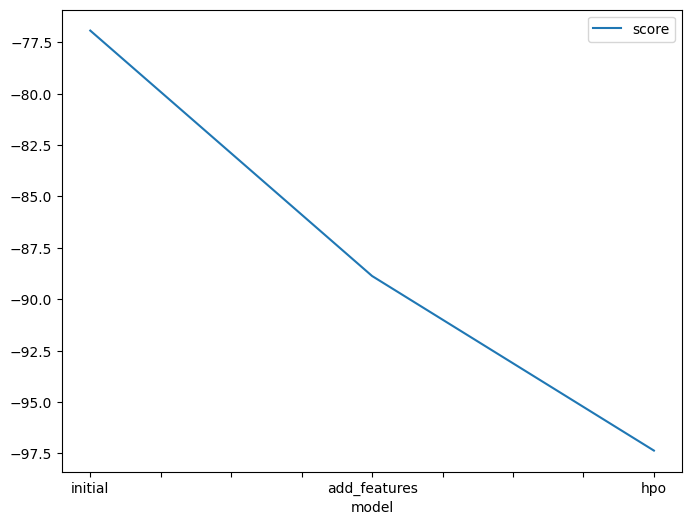

In [51]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [initial_rmse, add_features_rmse, hpo_rmse]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')
fig.show()

In [52]:
from IPython.utils.text import SList
scores= !kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10
# Convert SList object to a regular list
scores_list = list(scores)
# Join the list into a single string and split it into rows
rows = '\n'.join(scores_list).split('\n')
# Create a DataFrame by parsing fixed-width fields
score = pd.read_fwf(pd.io.common.StringIO('\n'.join(rows[2:])))
score.dropna(inplace=True)
score.drop(score.index[0], inplace=True, axis=0)
score.privateScore=score.privateScore.astype(float)

In [53]:
score.head()

,fileName,date,description,status,publicScore,privateScore
1,submission_new_hpo.csv,2024-05-08 07:25:29,new features with hyperparameters,complete,1.32607,1.32607
2,submission_new_features.csv,2024-05-08 07:15:03,new features,complete,1.34242,1.34242
3,submission.csv,2024-05-08 06:46:05,first raw submission,complete,1.79883,1.79883
4,submission_new_hpo.csv,2024-05-03 18:05:11,new features with hyperparameters,complete,1.31673,1.31673
5,submission_new_features.csv,2024-05-03 17:57:13,new features,complete,1.33877,1.33877


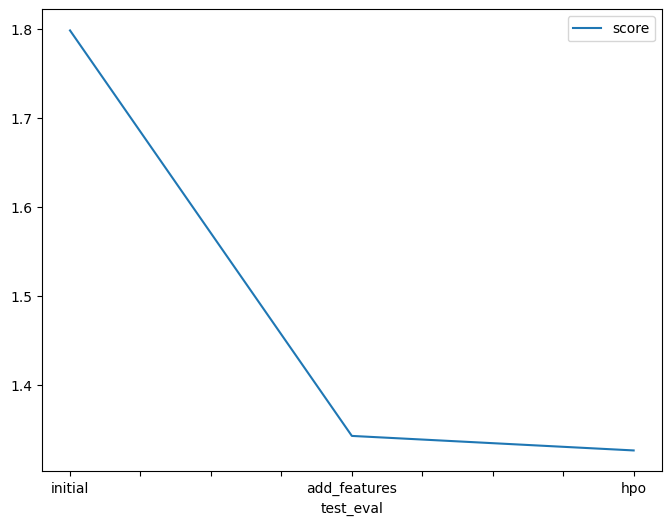

In [55]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [score.iloc[2,-1], score.iloc[1,-1], score.iloc[0,-1]]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [56]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "mae": [initial_mae, add_features_mae, hpo_mae],
    "mse": [initial_mse, add_features_mse, hpo_mse],
    "r2": [initial_r2, add_features_r2 , hpo_r2],
    "score": [initial_rmse, add_features_rmse, hpo_rmse]
})

,model,mae,mse,r2,score
0,initial,-52.103935,-5918.810341,0.819605,-76.933805
1,add_features,-57.001414,-7897.773720,0.759290,-88.869419
2,hpo,-69.734615,-9478.842656,0.711102,-97.359348


In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [59]:
X_train=train.drop('count',axis=1)

In [61]:
model=RandomForestClassifier(random_state=42).fit(X_train, train['count'])
y_pred = model.predict(test)

In [62]:
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_train)
mae = mean_absolute_error(train['count'], predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 7.829689509461694


In [64]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(train['count'], predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 43.668521146410015
